In [11]:
% matplotlib inline
import numpy as np
import math,random                                    #Intended for VAT - unused
from scipy.spatial.distance import pdist, squareform  #Intended for VAT - unused
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# read csv files
LGA_profiles = pd.read_csv("LGA_profiles_2015.csv", skipinitialspace=True, encoding = "ISO-8859-1")
all_schools = pd.read_csv("dv244-allschoolslist2017.csv", encoding = "ISO-8859-1")
LGA_pop = pd.read_csv("ABS_ERP_LGA2016.csv", encoding = "ISO-8859-1")

In [13]:
# Initialize attributes to be used in final integrated DataFrame
LGA_profiles["total_schools"] = 0
LGA_profiles["GOV_schools"] = 0
LGA_profiles["INDEPENDENT_schools"] = 0
LGA_profiles["CATHOLIC_schools"] = 0
LGA_profiles["Primary"] = 0
LGA_profiles["Secondary"] = 0
LGA_profiles["Primary/Secondary"] = 0
LGA_profiles["Est_pop_2016"] = 0
LGA_profiles["total_school_pop_ratio"] = 0
LGA_profiles["names"] = LGA_profiles["lga_name"]

# Will be indexed by the common LGA names between the datasets
LGA_profiles.set_index("lga_name", inplace=True)


LGA_arr = LGA_profiles.index.tolist()
LGA_profiles.head(5)

,total_offences_per_1000_pop,homeless_ppl_est_perc,ppl_with_low_english_proficiency_perc,ppl_who_believe_multiculturalism_makes_life_better_perc,ppl_help_as_volunteer_perc,ppl_who_rated_their_cmty_as_an_active_cmty_perc,ppl_who_attended_a_local_cmty_event_perc,total_schools,GOV_schools,INDEPENDENT_schools,CATHOLIC_schools,Primary,Secondary,Primary/Secondary,Est_pop_2016,total_school_pop_ratio,names
lga_name,,,,,,,,,,,,,,,,,
Alpine (S),41.8,3.5,1.2,59.7,31.4,93.7,77.4,0,0,0,0,0,0,0,0,0,Alpine (S)
Ararat (RC),109.5,2.5,0.3,40.3,30.5,90.9,78.1,0,0,0,0,0,0,0,0,0,Ararat (RC)
Ballarat (C),112.4,4.1,0.6,45.6,22.2,85.9,69.1,0,0,0,0,0,0,0,0,0,Ballarat (C)
Banyule (C),72.0,3.7,2.8,51.6,19.3,81.9,53.1,0,0,0,0,0,0,0,0,0,Banyule (C)
Bass Coast (S),78.9,1.8,0.7,43.5,24.7,88.6,74.5,0,0,0,0,0,0,0,0,0,Bass Coast (S)


In [14]:
# Create new attributes of different school types

all_schools = all_schools.rename(columns = {"LGA_Name":"lga_name"})
for index, row in all_schools.iterrows():
    if row["lga_name"] != "Unincorporated Vic":
        
        if row["Education_Sector"] == "Government":
            curr_val = LGA_profiles.ix[row["lga_name"]]["GOV_schools"]
            LGA_profiles.set_value(row["lga_name"], "GOV_schools", curr_val+1)

        if row["Education_Sector"] == "Independent":
            curr_val = LGA_profiles.ix[row["lga_name"]]["INDEPENDENT_schools"]
            LGA_profiles.set_value(row["lga_name"], "INDEPENDENT_schools", curr_val+1)

        if row["Education_Sector"] == "Catholic":
            curr_val = LGA_profiles.ix[row["lga_name"]]["CATHOLIC_schools"]
            LGA_profiles.set_value(row["lga_name"], "CATHOLIC_schools", curr_val+1)

        
        if row["School_Type"] == "Primary":
            curr_val = LGA_profiles.ix[row["lga_name"]]["Primary"]
            LGA_profiles.set_value(row["lga_name"], "Primary", curr_val+1)
        
        if row["School_Type"] == "Secondary":
            curr_val = LGA_profiles.ix[row["lga_name"]]["Secondary"]
            LGA_profiles.set_value(row["lga_name"], "Secondary", curr_val+1)
        
        if row["School_Type"] == "Pri/Sec":
            curr_val = LGA_profiles.ix[row["lga_name"]]["Primary/Secondary"]
            LGA_profiles.set_value(row["lga_name"], "Primary/Secondary", curr_val+1)
        
        # count total school number
        curr_val = LGA_profiles.ix[row["lga_name"]]["total_schools"]
        LGA_profiles.set_value(row["lga_name"], "total_schools", curr_val+1)


In [15]:
# Take 2016 population values for each LGA and add to final DataFrame
for index, row in LGA_pop.iterrows():
    region = row["Region"]
    if (row["TIME"] == 2016) and (region in LGA_arr):
        LGA_profiles.set_value(region, "Est_pop_2016", row["Value"])

# Convert homelessness to percentage format
LGA_profiles["homeless_ppl_est_perc"] = LGA_profiles["homeless_ppl_est_perc"] / 10 

# calculate the people per school in LGA ratio
LGA_profiles["total_school_pop_ratio"] =  LGA_profiles["Est_pop_2016"] / LGA_profiles["total_schools"]

LGA_profiles

,total_offences_per_1000_pop,homeless_ppl_est_perc,ppl_with_low_english_proficiency_perc,ppl_who_believe_multiculturalism_makes_life_better_perc,ppl_help_as_volunteer_perc,ppl_who_rated_their_cmty_as_an_active_cmty_perc,ppl_who_attended_a_local_cmty_event_perc,total_schools,GOV_schools,INDEPENDENT_schools,CATHOLIC_schools,Primary,Secondary,Primary/Secondary,Est_pop_2016,total_school_pop_ratio,names
lga_name,,,,,,,,,,,,,,,,,
Alpine (S),41.8,0.35,1.2,59.7,31.4,93.7,77.4,13,11,0,2,7,2,3,12010,923.846154,Alpine (S)
Ararat (RC),109.5,0.25,0.3,40.3,30.5,90.9,78.1,13,11,0,2,10,2,1,11022,847.846154,Ararat (RC)
Ballarat (C),112.4,0.41,0.6,45.6,22.2,85.9,69.1,46,29,4,13,33,6,5,103964,2260.086957,Ballarat (C)
Banyule (C),72.0,0.37,2.8,51.6,19.3,81.9,53.1,44,29,3,12,30,8,3,127791,2904.340909,Banyule (C)
Bass Coast (S),78.9,0.18,0.7,43.5,24.7,88.6,74.5,13,10,2,1,10,1,1,32848,2526.769231,Bass Coast (S)
Baw Baw (S),72.9,0.22,0.4,33.7,25.8,90.7,69.5,37,30,3,4,28,5,2,48072,1299.243243,Baw Baw (S)
Bayside (C),43.2,0.22,1.6,58.0,22.9,86.6,59.0,27,14,4,9,20,3,3,102882,3810.444444,Bayside (C)
Benalla (RC),77.5,0.22,0.4,44.0,28.5,93.3,75.1,9,5,2,2,6,1,1,13444,1493.777778,Benalla (RC)
Boroondara (C),38.8,0.22,3.2,67.3,25.1,82.9,58.3,58,27,17,14,31,9,13,176732,3047.103448,Boroondara (C)


,homeless_ppl_est_perc,total_school_pop_ratio
homeless_ppl_est_perc,1.000000,0.549287
total_school_pop_ratio,0.549287,1.000000


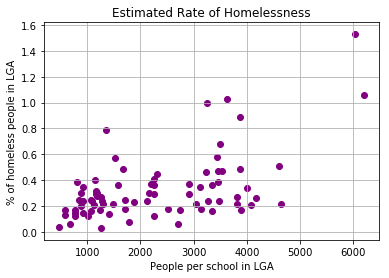

In [18]:
# homelessness scatter plot and Pearson correlation

plt.scatter(LGA_profiles["total_school_pop_ratio"], LGA_profiles["homeless_ppl_est_perc"], color="purple")
plt.xlabel("People per school in LGA")
plt.ylabel("% of homeless people in LGA")
plt.title("Estimated Rate of Homelessness")
plt.grid(True)
LGA_profiles[["homeless_ppl_est_perc", "total_school_pop_ratio"]].corr()
    

,ppl_help_as_volunteer_perc,total_school_pop_ratio
ppl_help_as_volunteer_perc,1.000000,-0.788744
total_school_pop_ratio,-0.788744,1.000000


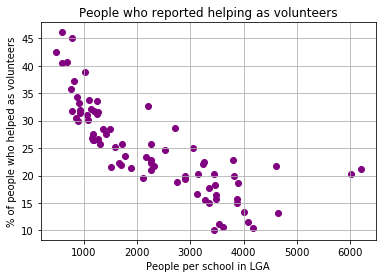

In [19]:
# volunteering scatter plot and Pearson correlation

plt.scatter(LGA_profiles["total_school_pop_ratio"], LGA_profiles["ppl_help_as_volunteer_perc"], color="purple")
plt.xlabel("People per school in LGA")
plt.ylabel("% of people who helped as volunteers")
plt.title("People who reported helping as volunteers")
plt.grid(True)
LGA_profiles[["ppl_help_as_volunteer_perc", "total_school_pop_ratio"]].corr()

,ppl_with_low_english_proficiency_perc,total_school_pop_ratio
ppl_with_low_english_proficiency_perc,1.000000,0.643057
total_school_pop_ratio,0.643057,1.000000


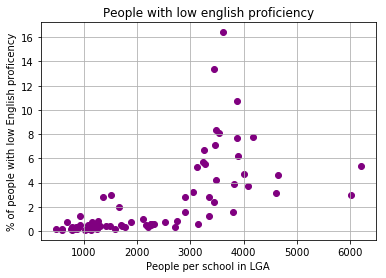

In [20]:
# low englihs proficiency scatter plot and Pearson correlation

plt.scatter(LGA_profiles["total_school_pop_ratio"], LGA_profiles["ppl_with_low_english_proficiency_perc"], color="purple")
plt.xlabel("People per school in LGA")
plt.ylabel("% of people with low English proficency")
plt.title("People with low english proficiency")
plt.grid(True)
LGA_profiles[["ppl_with_low_english_proficiency_perc", "total_school_pop_ratio"]].corr()


,ppl_who_believe_multiculturalism_makes_life_better_perc,total_school_pop_ratio
ppl_who_believe_multiculturalism_makes_life_better_perc,1.000000,0.643019
total_school_pop_ratio,0.643019,1.000000


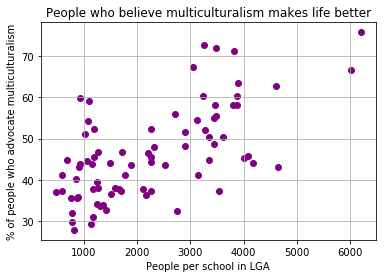

In [21]:
# multiculturalism scatter plot and Pearson correlation

plt.scatter(LGA_profiles["total_school_pop_ratio"], LGA_profiles["ppl_who_believe_multiculturalism_makes_life_better_perc"], color="purple")
plt.xlabel("People per school in LGA")
plt.ylabel("% of people who advocate multiculturalism")
plt.title("People who believe multiculturalism makes life better")
plt.grid(True)
LGA_profiles[["ppl_who_believe_multiculturalism_makes_life_better_perc", "total_school_pop_ratio"]].corr()


C:\Users\Max Philip\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


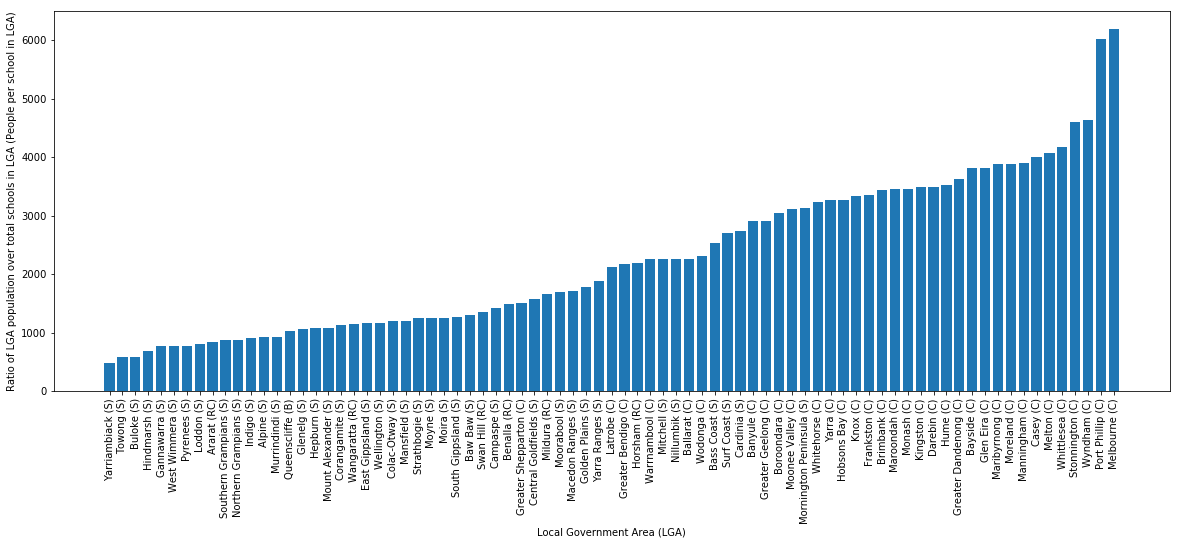

In [22]:
# Bar chart of ratio of LGA population over total schools in LGA
#                 - not used in final report

lisw = []
for i in range(79):
    lisw.append(i)
    
sorted_LGA = LGA_profiles.sort(columns = "total_school_pop_ratio", ascending=True)

fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)
ax.bar(lisw, sorted_LGA["total_school_pop_ratio"])
plt.xticks(range(len(LGA_arr)), sorted_LGA["names"], rotation= 90)
plt.ylabel("Ratio of LGA population over total schools in LGA (People per school in LGA)")
plt.xlabel("Local Government Area (LGA)")


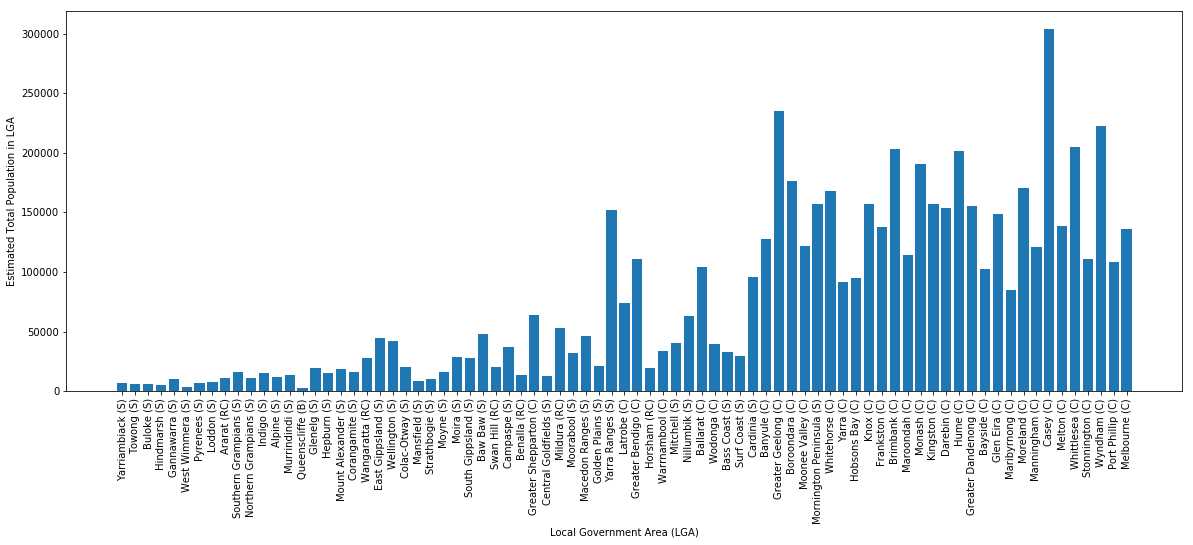

In [23]:
# population against LGA bar chart

fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)
ax.bar(lisw, sorted_LGA["Est_pop_2016"])
plt.xticks(range(len(LGA_arr)), sorted_LGA["names"], rotation= 90)
plt.ylabel("Estimated Total Population in LGA")
plt.xlabel("Local Government Area (LGA)")

C:\Users\Max Philip\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


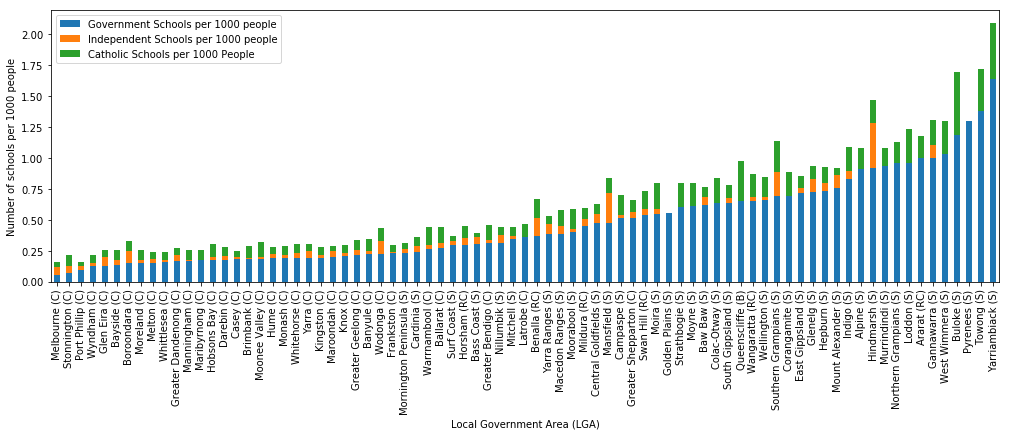

In [24]:
# stacked bar chart of school types against LGAs

bar_chart = pd.DataFrame()

bar_chart["Government Schools per 1000 people"] = (LGA_profiles["GOV_schools"] / LGA_profiles["Est_pop_2016"]) * 1000
bar_chart["Independent Schools per 1000 people"] = (LGA_profiles["INDEPENDENT_schools"] / LGA_profiles["Est_pop_2016"]) * 1000
bar_chart["Catholic Schools per 1000 People"] = (LGA_profiles["CATHOLIC_schools"] / LGA_profiles["Est_pop_2016"]) *1000
#bar_chart["est_pop"] = LGA_profiles["Est_pop_2016"]

sorted_bar = bar_chart.sort(columns = "Government Schools per 1000 people", ascending=True)


ax = sorted_bar.plot.bar(stacked=True, figsize=(17,5))
ax.set(ylabel = "Number of schools per 1000 people", xlabel = "Local Government Area (LGA)")


,total_offences_per_1000_pop,total_school_pop_ratio
total_offences_per_1000_pop,1.000000,0.404212
total_school_pop_ratio,0.404212,1.000000


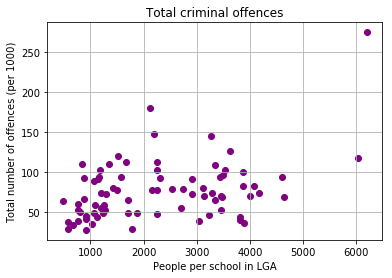

In [25]:
# criminal offence rates scatter plot and Pearson correlation

plt.scatter(LGA_profiles["total_school_pop_ratio"], LGA_profiles["total_offences_per_1000_pop"], color="purple")
plt.xlabel("People per school in LGA")
plt.ylabel("Total number of offences (per 1000)")
plt.title("Total criminal offences")
plt.grid(True)
LGA_profiles[["total_offences_per_1000_pop", "total_school_pop_ratio"]].corr()


,ppl_who_rated_their_cmty_as_an_active_cmty_perc,total_school_pop_ratio
ppl_who_rated_their_cmty_as_an_active_cmty_perc,1.000000,-0.811423
total_school_pop_ratio,-0.811423,1.000000


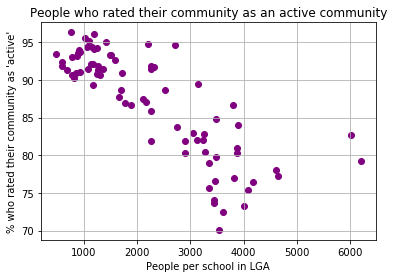

In [26]:
# active community ratings scatter plot and Pearson correlation

plt.scatter(LGA_profiles["total_school_pop_ratio"], LGA_profiles["ppl_who_rated_their_cmty_as_an_active_cmty_perc"], color="purple")
plt.xlabel("People per school in LGA")
plt.ylabel("% who rated their community as 'active'")
plt.title("People who rated their community as an active community")
plt.grid(True)
LGA_profiles[["ppl_who_rated_their_cmty_as_an_active_cmty_perc", "total_school_pop_ratio"]].corr()


,ppl_who_attended_a_local_cmty_event_perc,total_school_pop_ratio
ppl_who_attended_a_local_cmty_event_perc,1.00000,-0.79246
total_school_pop_ratio,-0.79246,1.00000


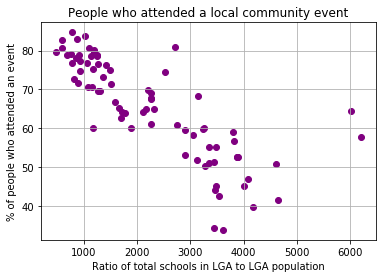

In [27]:
# local community event attendees scatter plot and Pearson correlation

plt.scatter(LGA_profiles["total_school_pop_ratio"], LGA_profiles["ppl_who_attended_a_local_cmty_event_perc"], color="purple")
plt.xlabel("Ratio of total schools in LGA to LGA population")
plt.ylabel("% of people who attended an event")
plt.title("People who attended a local community event")
plt.grid(True)
LGA_profiles[["ppl_who_attended_a_local_cmty_event_perc", "total_school_pop_ratio"]].corr()


In [28]:
# Experimentation with the VAT algorithm, unused in the final report
# Taken from the code provided in Workshop 6


def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I

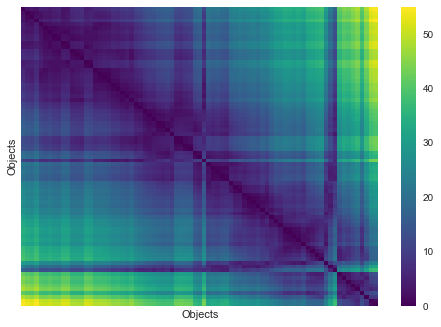

In [29]:
import seaborn as sns

# Experimentation with the VAT algorithm, unused in the final report

community_boz = pd.DataFrame()
community_boz["attend_cmty_event_mdiff"] = LGA_profiles["ppl_who_attended_a_local_cmty_event_perc"]
community_boz["active_cmty_mdiff"] = LGA_profiles["ppl_who_rated_their_cmty_as_an_active_cmty_perc"]
#community_boz["volunteer_mdiff"] = LGA_profiles["ppl_help_as_volunteer_perc"] - LGA_profiles["ppl_help_as_volunteer_perc"].mean()

#community_boz["multi_mdiff"] = LGA_profiles["ppl_who_believe_multiculturalism_makes_life_better_perc"]
#community_boz["low_eng_mdiff"] = LGA_profiles["ppl_with_low_english_proficiency_perc"]
#community_boz["offences_mdiff"] = LGA_profiles["total_offences_per_1000_pop"]
#community_boz["homeless_mdiff"] = LGA_profiles["homeless_ppl_est_perc"]

# LGA_profiles["names"] = 0
# sns.heatmap(community_boz,cmap='viridis',xticklabels=True,yticklabels=False)
# plt.xlabel("Ratio of total schools in LGA to LGA population")
# plt.ylabel("ppl_who_attended_a_local_cmty_event_perc")
# plt.show()

RV, C, I = VAT(community_boz)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()

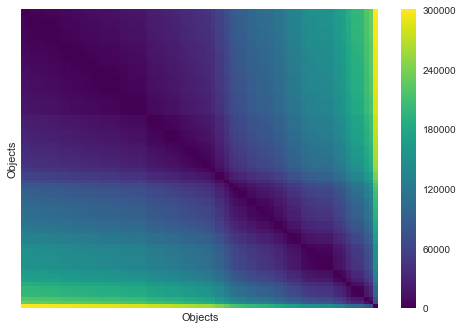

In [30]:

community_boz["low_eng"] = LGA_profiles["ppl_with_low_english_proficiency_perc"] - LGA_profiles["ppl_with_low_english_proficiency_perc"].mean()
community_boz["multi_cult"] = LGA_profiles["ppl_who_believe_multiculturalism_makes_life_better_perc"] - LGA_profiles["ppl_who_believe_multiculturalism_makes_life_better_perc"].mean()

LGA_profiles["names"] = 0

RV, C, I = VAT(LGA_profiles)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()

49.7 93.6 mean= 76.55696202531644 median= 72.0 IQR= 43.89999999999999


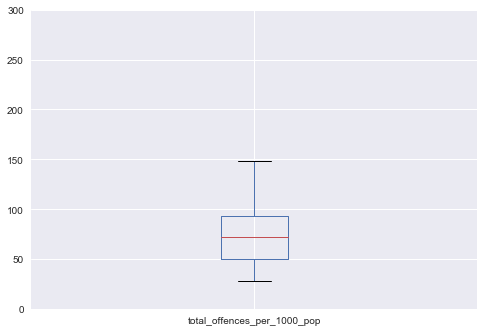

In [31]:
# Experimenting with boxplots
# Not enough space in the final report to incorporate

q1= LGA_profiles["total_offences_per_1000_pop"].quantile(.25)
q3=LGA_profiles["total_offences_per_1000_pop"].quantile(.75)
iqr = q3-q1
print(q1,q3,"mean=",LGA_profiles["total_offences_per_1000_pop"].mean(),"median=",LGA_profiles["total_offences_per_1000_pop"].median(),"IQR=",iqr)

LGA_profiles["total_offences_per_1000_pop"].plot(kind = "box", ylim=(0,300), showfliers=True)
plt.show()

In [35]:
school_types = ["GOV_schools", "INDEPENDENT_schools", "CATHOLIC_schools", "Primary", "Secondary", "Primary/Secondary"]
indicators = ["total_offences_per_1000_pop", "homeless_ppl_est_perc", "ppl_with_low_english_proficiency_perc", "ppl_who_believe_multiculturalism_makes_life_better_perc", "ppl_help_as_volunteer_perc", "ppl_who_rated_their_cmty_as_an_active_cmty_perc", "ppl_who_attended_a_local_cmty_event_perc"]

comp_data = pd.DataFrame()

# comp_data.set_index(indicators)


# for s_type in school_types:
#     for ind in indicators:
#         comp_data[s_type][ind] = LGA_profiles[[s_type, ind]].corr()
#         print(LGA_profiles[[s_type, ind]].corr())
        
for ind in indicators:
    row = {}
    for s_type in school_types:
        row[s_type] = LGA_profiles[s_type].corr(LGA_profiles[ind])
    row1 = pd.DataFrame(row, index = [ind])
    comp_data = comp_data.append(row1)
        

In [36]:
comp_data

,CATHOLIC_schools,GOV_schools,INDEPENDENT_schools,Primary,Primary/Secondary,Secondary
total_offences_per_1000_pop,0.121868,0.094172,0.154049,0.077426,0.010970,0.208005
homeless_ppl_est_perc,0.197664,0.084508,0.237056,0.065356,0.096898,0.274303
ppl_with_low_english_proficiency_perc,0.612428,0.389943,0.327978,0.405575,0.296432,0.555847
ppl_who_believe_multiculturalism_makes_life_better_perc,0.321733,0.063022,0.462875,0.113148,0.200369,0.312437
ppl_help_as_volunteer_perc,-0.720436,-0.646023,-0.444250,-0.661614,-0.391924,-0.708267
ppl_who_rated_their_cmty_as_an_active_cmty_perc,-0.729414,-0.583197,-0.542042,-0.587793,-0.539752,-0.722699
ppl_who_attended_a_local_cmty_event_perc,-0.777670,-0.609378,-0.487109,-0.631219,-0.478579,-0.722913


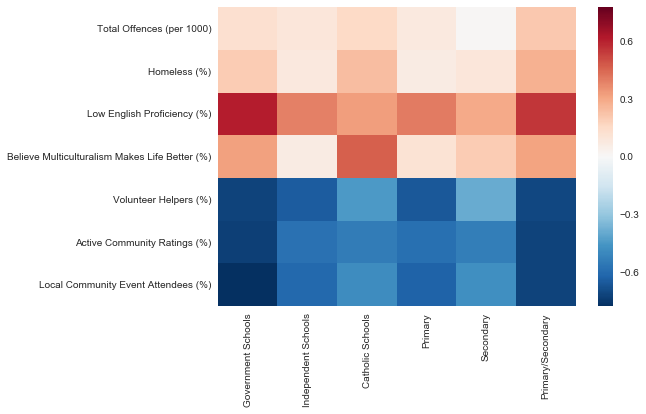

In [37]:
# heatmap of the correlations between community indicators and all available
# school types

x_label = ["Government Schools", "Independent Schools", "Catholic Schools", "Primary", "Secondary", "Primary/Secondary"]
y_label = ["Total Offences (per 1000)", "Homeless (%)", "Low English Proficiency (%)", "Believe Multiculturalism Makes Life Better (%)", "Volunteer Helpers (%)", "Active Community Ratings (%)", "Local Community Event Attendees (%)"]

sns.heatmap(comp_data, yticklabels=y_label, xticklabels=x_label)
